In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
X = digits.data

In [5]:
y= digits.target

In [6]:
X.shape

(1797, 64)

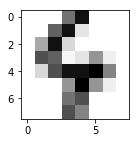

In [8]:
index= np.random.randint(0,1797)
plt.figure (figsize=(2,2))
plt.imshow(X[index].reshape(8,8), cmap='Greys')

In [9]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters=10)

In [12]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
kmeans.labels_

array([6, 5, 5, ..., 5, 1, 1])

In [14]:
kmeans.cluster_centers_[0].shape

(64,)

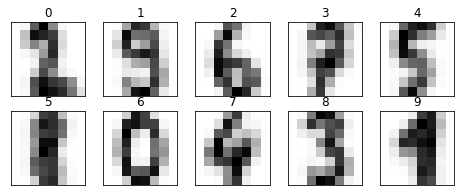

In [17]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
ax = ax.reshape(-1)
for i in range(10):
    ax[i].set(xticks=[], yticks=[])
    ax[i].imshow(centers[i], cmap='Greys')
    ax[i].set_title(i)

In [18]:
from scipy.stats import mode

In [20]:
labels = np.zeros(1797)
for i in range(10):
    mask = (kmeans.labels_ == i)
    labels[mask] = mode(y[mask])[0]

In [21]:
labels

array([0., 8., 8., ..., 8., 9., 9.])

In [22]:
from sklearn.metrics import classification_report

In [23]:
print (classification_report(y, labels))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       178
          1       0.59      0.30      0.40       182
          2       0.85      0.84      0.84       177
          3       0.87      0.84      0.86       183
          4       0.98      0.90      0.94       181
          5       0.91      0.75      0.82       182
          6       0.97      0.98      0.98       181
          7       0.84      0.97      0.90       179
          8       0.45      0.57      0.51       174
          9       0.56      0.77      0.65       180

avg / total       0.80      0.79      0.79      1797



In [24]:
from sklearn.manifold import TSNE

In [27]:
tsne = TSNE(n_components=2)

In [28]:
tsne_features = tsne.fit_transform(X)

In [29]:
kmeans = KMeans(n_clusters=10)

In [30]:
kmeans.fit(tsne_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [31]:
labels = np.zeros(1797)
for i in range(10):
    mask = (kmeans.labels_ == i)
    labels[mask] = mode(y[mask])[0]

In [32]:
print (classification_report(y, labels))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       178
          1       0.84      0.81      0.82       182
          2       0.86      0.94      0.90       177
          3       0.99      0.98      0.99       183
          4       1.00      0.98      0.99       181
          5       0.98      0.97      0.98       182
          6       0.99      1.00      1.00       181
          7       0.94      1.00      0.97       179
          8       0.87      0.95      0.91       174
          9       0.97      0.80      0.88       180

avg / total       0.95      0.94      0.94      1797



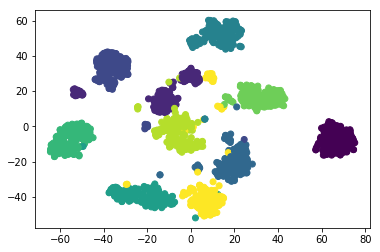

In [35]:
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=y)